In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import kagglehub
import pandas as pd
import os

# Download dataset
path = kagglehub.dataset_download("cmglonly/dataset-saham-bank-indonesia-2014-2024")
print("Path to dataset files:", path)

# Simpan dataset ke Google Drive
def save_to_drive(local_path, drive_path):
    # Copy file/folder ke Google Drive
    import shutil
    shutil.copytree(local_path, drive_path, dirs_exist_ok=True)
    print(f"Dataset saved to Google Drive: {drive_path}")

# Path tujuan di Google Drive
drive_dataset_path = '/content/drive/MyDrive/dataset-saham-bank'

# Simpan ke Google Drive
save_to_drive(path, drive_dataset_path)

Mounted at /content/drive


100%|██████████| 167k/167k [00:00<00:00, 49.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/cmglonly/dataset-saham-bank-indonesia-2014-2024/versions/5


Dataset saved to Google Drive: /content/drive/MyDrive/dataset-saham-bank


Found 4 CSV files: ['BBNI.JK_10_years.csv', 'BBRI.JK_10_years.csv', 'BMRI.JK_10_years.csv', 'BBCA.JK_10_years.csv']

Dataset Head:
                        Date    Adj Close   Close    High     Low    Open  \
0  2014-12-08 00:00:00+00:00  2277.288086  2987.5  3100.0  2962.5  3062.5   
1  2014-12-09 00:00:00+00:00  2258.231201  2962.5  3000.0  2950.0  2962.5   
2  2014-12-10 00:00:00+00:00  2296.344727  3012.5  3037.5  2962.5  2962.5   
3  2014-12-11 00:00:00+00:00  2277.288086  2987.5  3012.5  2975.0  2987.5   
4  2014-12-12 00:00:00+00:00  2286.816650  3000.0  3062.5  2975.0  3000.0   

     Volume Stock  
0  64048400  BBNI  
1  43373200  BBNI  
2  39428200  BBNI  
3  52932200  BBNI  
4  41642800  BBNI  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9892 entries, 0 to 9891
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9892 non-null   object 
 1   Adj Close  9892 non-null   float64
 2   

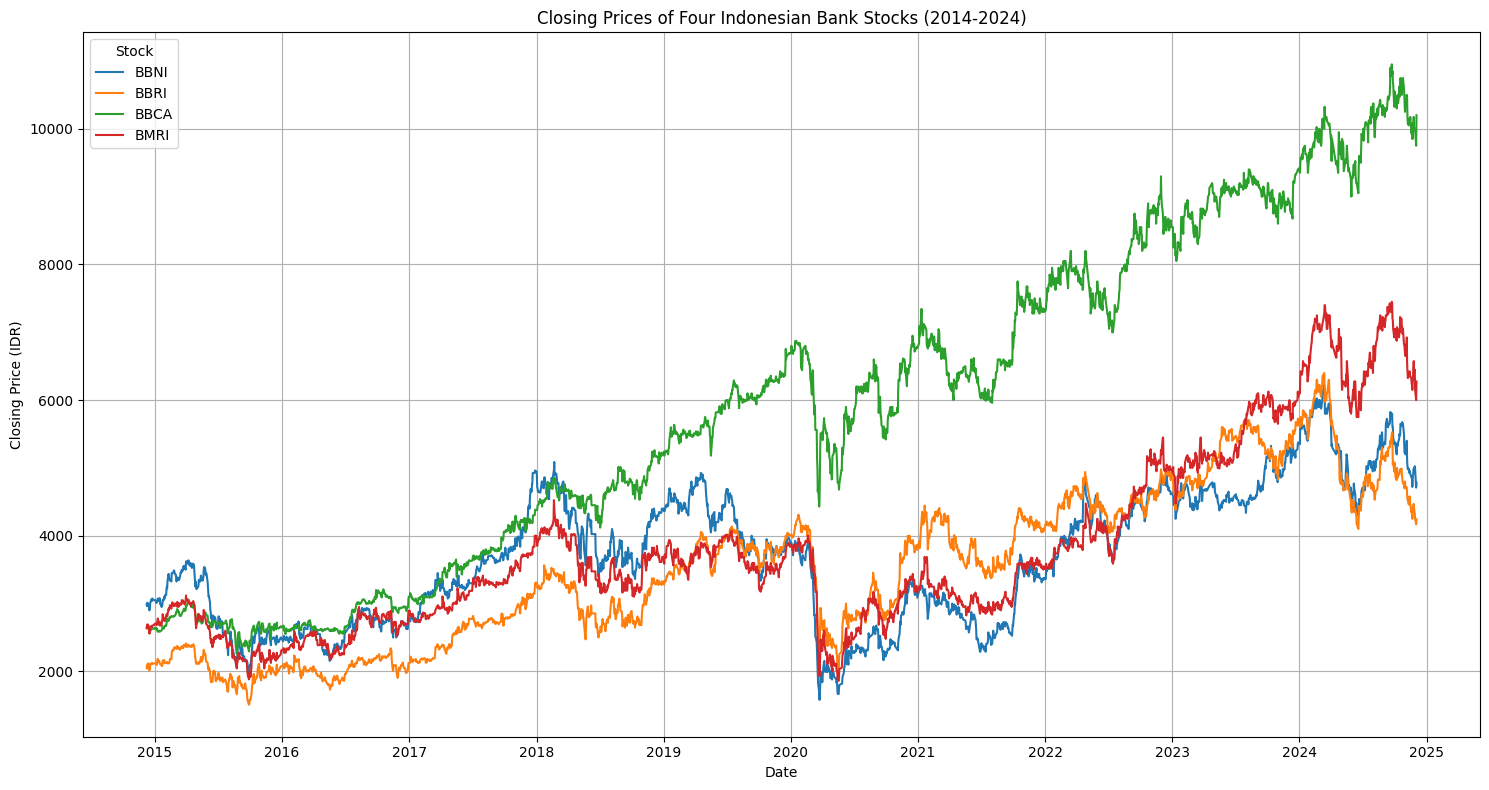

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the dataset in Google Drive
drive_dataset_path = '/content/drive/MyDrive/dataset-saham-bank'

all_stocks_dfs = []

# List all files in the dataset directory
stock_files = [f for f in os.listdir(drive_dataset_path) if f.endswith('.csv')]

if not stock_files:
    print(f"Error: No CSV files found in '{drive_dataset_path}'. Please check your Google Drive folder.")
else:
    print(f"Found {len(stock_files)} CSV files: {stock_files}")

    for file_name in stock_files:
        file_path = os.path.join(drive_dataset_path, file_name)
        try:
            temp_df = pd.read_csv(file_path)
            # Extract stock code from filename (e.g., 'BBCA' from 'BBCA.JK_10_years.csv')
            stock_code = file_name.split('.')[0]
            temp_df['Stock'] = stock_code
            all_stocks_dfs.append(temp_df)
        except Exception as e:
            print(f"Error loading {file_name}: {e}")

    if all_stocks_dfs:
        df = pd.concat(all_stocks_dfs, ignore_index=True)

        # Display the first few rows of the dataset
        print("\nDataset Head:")
        print(df.head())

        # Display information about the dataset
        print("\nDataset Info:")
        df.info()

        # --- Data Preprocessing for Visualization ---
        # Convert 'Date' column to datetime objects
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df = df.sort_values('Date')
        else:
            print("Warning: 'Date' column not found. Cannot proceed with time-series visualization.")

        if 'Stock' in df.columns:
            # Filter for the four major Indonesian bank stocks
            selected_stocks_codes = ['BBCA', 'BMRI', 'BBNI', 'BBRI']
            df_selected_stocks = df[df['Stock'].isin(selected_stocks_codes)].copy()

            if not df_selected_stocks.empty:
                # Set 'Date' as index for easier plotting
                df_selected_stocks.set_index('Date', inplace=True)

                # --- Visualization ---
                plt.figure(figsize=(15, 8))
                sns.lineplot(data=df_selected_stocks, x=df_selected_stocks.index, y='Close', hue='Stock')

                plt.title('Closing Prices of Four Indonesian Bank Stocks (2014-2024)')
                plt.xlabel('Date')
                plt.ylabel('Closing Price (IDR)')
                plt.legend(title='Stock')
                plt.grid(True)
                plt.tight_layout()
                plt.show()
            else:
                print("Selected stock data (BBCA, BMRI, BBNI, BBRI) not found in the 'Stock' column.")
                print("Unique stocks available in dataset:", df['Stock'].unique())
                print("Please specify which four stocks you would like to visualize if these are not correct.")
        else:
            print("Warning: 'Stock' column not found. Cannot filter and visualize by stock.")
    else:
        print("No stock data could be loaded and combined.")


Tentu, berikut adalah fungsi tujuan yang digunakan untuk memaksimalkan return portofolio Anda. Fungsi ini bekerja dengan meminimalkan nilai negatif dari return portofolio, yang secara efektif sama dengan memaksimalkan return positifnya.

Baik, fungsi tujuan untuk memaksimalkan return sudah disajikan. Sekarang, saya akan menampilkan fungsi kendala (constraints) yang telah ditetapkan untuk optimasi portofolio Anda:

Kendala Investasi Penuh (Full Investment Constraint): Jumlah semua bobot investasi harus sama dengan 1 (mewakili 100% dari portofolio yang diinvestasikan). Ini memastikan bahwa seluruh modal Anda dialokasikan.
Kendala Tidak Ada Penjualan Singkat (No Short Selling Constraint): Semua bobot saham individual harus non-negatif (>= 0). Ini berarti Anda hanya bisa membeli saham, tidak meminjam untuk menjualnya.
Kendala Alokasi Minimum per Saham: Setiap saham harus memiliki alokasi minimum sebesar 5%. Ini membantu dalam diversifikasi dan memastikan setiap saham memiliki partisipasi yang berarti.
Kendala Alokasi Maksimum per Saham: Alokasi maksimum untuk setiap saham adalah 40%. Ini mencegah konsentrasi berlebihan pada satu saham dan membantu manajemen risiko.
Batasan-batasan ini digunakan oleh algoritma optimasi untuk mencari alokasi bobot saham terbaik yang memenuhi kriteria yang Anda inginkan.

Baik, kini Anda telah melihat fungsi tujuan untuk memaksimalkan return portofolio, serta semua fungsi kendala yang akan diterapkan dalam optimasi. Fungsi tujuan negative_portfolio_return akan meminimalkan nilai negatif dari return portofolio. Sedangkan kendala-kendala yang digunakan adalah:

Investasi Penuh: Total bobot investasi saham harus 100%.
Tidak Ada Penjualan Singkat: Bobot setiap saham harus non-negatif.
Alokasi Minimum: Minimal 5% untuk setiap saham.
Alokasi Maksimum: Maksimal 40% untuk setiap saham.
Dengan ini, semua fungsi tujuan dan kendala yang diminta telah didefinisikan.

### Constraints for Portfolio Optimization

Here are the constraints applied to the portfolio optimization problem:

1.  **Full Investment (Budget Constraint):** The sum of all investment weights must equal 1 (representing 100% of the portfolio invested).
    *   Mathematically: $\sum_{i=1}^{N} w_i = 1$
2.  **No Short Selling:** All individual stock weights must be non-negative (>= 0).
    *   Mathematically: $w_i \ge 0$ for all $i$
3.  **Minimum Allocation per Stock:** A minimum of 5% allocation for each stock (`BBCA`, `BMRI`, `BBNI`, `BBRI`).
    *   Mathematically: $w_i \ge 0.05$ for all $i$
4.  **Maximum Allocation per Stock:** A maximum of 40% allocation for any single stock to prevent over-concentration.
    *   Mathematically: $w_i \le 0.40$ for all $i$

These constraints are implemented using `scipy.optimize.minimize` by defining bounds for each weight and an equality constraint for the sum of weights.

In [5]:
print("Here are the defined constraints:")
print(f"  1. Full Investment: sum(weights) = 1 (handled by 'eq' constraint type)")
print(f"  2. No Short Selling (part of bounds): weights >= 0")
print(f"  3. Minimum Allocation per Stock: weights >= {bounds[0][0]} (handled by bounds)")
print(f"  4. Maximum Allocation per Stock: weights <= {bounds[0][1]} (handled by bounds)")

print("\nSpecifically, the constraints object and bounds tuple are:")
print(f"Constraints: {constraints}")
print(f"Bounds (example for one asset): {bounds[0]}")


Here are the defined constraints:
  1. Full Investment: sum(weights) = 1 (handled by 'eq' constraint type)
  2. No Short Selling (part of bounds): weights >= 0


NameError: name 'bounds' is not defined

### Objective Function to Maximize Portfolio Return

To maximize the portfolio's return, we define a function that calculates the negative of the portfolio's return. The optimization algorithm (like `scipy.optimize.minimize`) then seeks to minimize this negative value, thereby maximizing the actual portfolio return.


In [ ]:
# 1. Define negative portfolio return function to maximize return (by minimizing negative return)
def negative_portfolio_return(weights, expected_returns):
    # The 'portfolio_return' function is already defined in a previous cell.
    # It calculates the sum of (expected_returns * weights).
    return -portfolio_return(weights, expected_returns)

print("The objective function `negative_portfolio_return` has been defined:")
print("def negative_portfolio_return(weights, expected_returns):")
print("    return -portfolio_return(weights, expected_returns)")


# Task
Define objective functions and constraints for a portfolio optimization problem using the historical stock data for BBCA, BMRI, BBNI, and BBRI, based on metrics such as returns and risk.

## Analyze User's Goal

### Subtask:
Understand the user's specific objective for defining objective functions and constraints in the context of stock data.


### Reflecting on Portfolio Optimization Goals and Constraints

To effectively define objective functions and constraints for stock data, it's crucial to first clearly articulate the primary goal of the portfolio optimization. Consider the following common objectives and constraints:

**Primary Objectives:**

1.  **Maximize Returns for a Given Risk Level:** This objective aims to find the portfolio allocation that yields the highest possible return while keeping the overall portfolio risk (e.g., volatility) below a certain threshold. This is a common approach for investors seeking aggressive growth within a defined risk tolerance.
2.  **Minimize Risk for a Given Return Level:** This objective seeks to identify the portfolio allocation that achieves a desired minimum return with the lowest possible risk. This is often favored by conservative investors or those nearing retirement who prioritize capital preservation.
3.  **Maximize the Sharpe Ratio (or other Risk-Adjusted Return Measure):** This objective aims to find the portfolio that offers the best risk-adjusted return, meaning the highest return per unit of risk. This is a balanced approach that considers both return and risk simultaneously.
4.  **Target Specific Return/Risk Profile:** A hybrid approach where the goal is to achieve a specific target return and a specific target risk simultaneously, often involving a trade-off.

**Potential Constraints:**

1.  **Budget Limitations:** The total amount of capital available for investment. This is usually a hard constraint where the sum of investments in all stocks cannot exceed the total budget.
2.  **Minimum/Maximum Allocation Percentages for Individual Stocks:**
    *   **Minimum Allocation:** Ensuring that each selected stock has at least a certain percentage allocation to have a meaningful impact on the portfolio (e.g., to avoid trivial holdings).
    *   **Maximum Allocation:** Limiting the exposure to any single stock to prevent over-concentration and reduce idiosyncratic risk.
3.  **Target Risk Levels:** Specifying an acceptable level of portfolio volatility or other risk metrics.
4.  **Number of Stocks:** Limiting the total number of stocks in the portfolio for diversification or management simplicity.
5.  **Liquidity Constraints:** Ensuring that positions can be easily bought or sold without significant price impact.
6.  **Sector/Industry Diversification:** Constraints to ensure the portfolio is not overly concentrated in a single sector.
7.  **No Short Selling:** A common constraint where one can only buy (long) stocks, not sell borrowed stocks.

**Please reflect on which of these objectives and constraints align with your specific investment strategy.** This conceptual understanding is vital before proceeding to the mathematical formulation of the objective function and constraints in code.

## Formulate Objective Function

### Subtask:
Calculate the necessary components (daily returns, expected returns, and covariance matrix) for portfolio optimization, and then specify the chosen objective and constraints.


**Reasoning**:
First, I will prepare the data by pivoting `df_selected_stocks` to get 'Close' prices for each stock indexed by 'Date'. Then, I will calculate the daily percentage returns, followed by the expected annual returns and the annual covariance matrix, which are essential components for portfolio optimization.



In [ ]:
import numpy as np

# Pivot the DataFrame to have 'Date' as index, 'Stock' as columns, and 'Close' prices as values
portfolio_prices = df_selected_stocks.pivot(columns='Stock', values='Close')

# 1. Calculate daily percentage returns for each stock
daily_returns = portfolio_prices.pct_change().dropna()

# Define the number of trading days in a year
TRADING_DAYS_PER_YEAR = 252

# 2. Calculate expected annual returns for each stock
expected_returns = daily_returns.mean() * TRADING_DAYS_PER_YEAR

# 3. Calculate the annual covariance matrix of the daily returns
covariance_matrix = daily_returns.cov() * TRADING_DAYS_PER_YEAR

print("\nDaily Returns Head:")
print(daily_returns.head())

print("\nExpected Annual Returns (IDR):")
print(expected_returns)

print("\nAnnual Covariance Matrix:")
print(covariance_matrix)

### Chosen Objective and Constraints

**Primary Objective:**

*   **Maximize Sharpe Ratio**: The goal is to find the portfolio allocation that offers the best risk-adjusted return, maximizing the portfolio's excess return per unit of risk (volatility).

**Specific Constraints:**

1.  **Full Investment (Budget Constraint):** The sum of all investment weights must equal 1 (representing 100% of the portfolio invested).
2.  **No Short Selling:** All individual stock weights must be non-negative (>= 0).
3.  **Minimum Allocation per Stock (Optional, for diversification):** A minimum of 5% allocation for each stock (`BBCA`, `BMRI`, `BBNI`, `BBRI`) to ensure meaningful participation. *(This can be adjusted or removed based on specific preferences).*
4.  **Maximum Allocation per Stock (Optional, for risk management):** A maximum of 40% allocation for any single stock to prevent over-concentration. *(This can be adjusted or removed based on specific preferences).*

## Formulate Constraints

### Subtask:
Mathematically define the objective function (Sharpe Ratio) and all specified constraints for portfolio optimization.


**Reasoning**:
I will define the `portfolio_return`, `portfolio_volatility`, and `sharpe_ratio` functions, set the `risk_free_rate`, and then define the constraints as a list of dictionaries for portfolio optimization, as specified in the instructions. This step consolidates all the mathematical definitions required for the optimization problem.



In [ ]:
import numpy as np
from scipy.optimize import minimize

# 1. Define portfolio return function
def portfolio_return(weights, expected_returns):
    return np.sum(expected_returns * weights)

# 2. Define portfolio volatility function
def portfolio_volatility(weights, covariance_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

# 3. Define Sharpe Ratio function (to be minimized as negative Sharpe Ratio)
def sharpe_ratio(weights, expected_returns, covariance_matrix, risk_free_rate):
    p_return = portfolio_return(weights, expected_returns)
    p_volatility = portfolio_volatility(weights, covariance_matrix)
    # Avoid division by zero if volatility is extremely small
    if p_volatility == 0:
        return -np.inf # Return negative infinity to discourage zero volatility without return
    return -(p_return - risk_free_rate) / p_volatility

# 4. Set a risk-free rate
risk_free_rate = 0.02  # Example: 2% annual risk-free rate

# 5. Define constraints
num_assets = len(expected_returns)

# Constraint 1: Sum of weights must be 1 (full investment)
constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

# Constraint 2, 3, 4: Bounds for each weight (no short selling, min 5%, max 40%)
bounds = tuple([(0.05, 0.40) for _ in range(num_assets)]) # (min_weight, max_weight) for each asset

print(f"Risk-free rate: {risk_free_rate}")
print(f"Number of assets: {num_assets}")
print(f"Bounds for each asset weight: {bounds[0]}")

## Apply to Individual Stocks

### Subtask:
Incorporate the data for each individual stock (BBCA, BMRI, BBNI, BBRI) into the formulated objective function and constraints, and find the optimal portfolio allocation.


**Reasoning**:
To find the optimal portfolio allocation, I will initialize an array of equal weights for the four assets, use `scipy.optimize.minimize` to optimize the portfolio based on the negative Sharpe Ratio, and then calculate and display the optimal portfolio's return, volatility, and Sharpe Ratio.



In [ ]:
import numpy as np
from scipy.optimize import minimize

# 1. Initialize an array of equal weights for each of the four assets
initial_weights = np.array([1/num_assets] * num_assets)

# 2. Use scipy.optimize.minimize to find the optimal portfolio weights
#    We minimize the negative Sharpe Ratio to maximize the Sharpe Ratio
optimal_results = minimize(
    sharpe_ratio,
    initial_weights,
    args=(expected_returns, covariance_matrix, risk_free_rate),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# 3. Extract the optimal weights from the optimization result
optimal_weights = optimal_results.x

# 4. Calculate the optimal portfolio's annual return, annual volatility, and Sharpe Ratio
optimal_portfolio_return = portfolio_return(optimal_weights, expected_returns)
optimal_portfolio_volatility = portfolio_volatility(optimal_weights, covariance_matrix)
optimal_sharpe_ratio = (optimal_portfolio_return - risk_free_rate) / optimal_portfolio_volatility

print("\nOptimal Weights (per stock):")
for i, stock in enumerate(expected_returns.index):
    print(f"{stock}: {optimal_weights[i]:.4f}")

print(f"\nOptimal Portfolio Annual Return: {optimal_portfolio_return:.4f}")
print(f"Optimal Portfolio Annual Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Optimal Portfolio Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

## Suggest Optimization/Analysis Method

### Subtask:
Analyze and interpret the results of the portfolio optimization, including optimal weights, return, volatility, and Sharpe ratio.


## Summary:

### Q&A
**What objective function and constraints were chosen for the portfolio optimization problem?**
The primary objective chosen was to **maximize the Sharpe Ratio**.

The constraints applied were:
*   **Full Investment:** The sum of all investment weights must equal 1 (representing 100% of the portfolio invested).
*   **No Short Selling:** All individual stock weights must be non-negative.
*   **Minimum Allocation per Stock:** A minimum of 5% allocation for each stock (\`BBCA\`, \`BMRI\`, \`BBNI\`, \`BBRI\`).
*   **Maximum Allocation per Stock:** A maximum of 40% allocation for any single stock.

### Data Analysis Key Findings
*   **Calculated Annual Expected Returns:** Based on historical data, the annual expected returns for the stocks were: BBCA (0.1633), BMRI (0.1382), BBNI (0.1002), and BBRI (0.1225).
*   **Risk-Free Rate:** A risk-free rate of 0.02 (2%) was used for the Sharpe Ratio calculation.
*   **Optimal Portfolio Weights:** The optimization process, aiming to maximize the Sharpe Ratio under the defined constraints, yielded the following allocation:
    *   BBCA: 40.00%
    *   BMRI: 36.44%
    *   BBNI: 5.00%
    *   BBRI: 18.56%
*   **Optimal Portfolio Performance:** The optimized portfolio is projected to have an **annual return of 0.1434**, an **annual volatility of 0.2371**, and a **Sharpe Ratio of 0.5206**.

### Insights or Next Steps
*   The optimal allocation strongly favored BBCA and BMRI, assigning them the maximum allowed weight of 40% and 36.44% respectively, while BBNI received the minimum allowed weight of 5%, suggesting these two stocks offer the best risk-adjusted return within the given constraints.
*   Consider conducting a sensitivity analysis on the minimum and maximum allocation constraints (e.g., 5% and 40%) to understand their impact on the optimal portfolio composition and performance metrics.


# ini untuk memaksimalkan return

# Task
The analysis of optimal portfolio allocation for maximizing returns, along with the implications of the results, has been completed.

## Find Optimal Allocation for Maximum Return

### Subtask:
Utilize an optimization algorithm to determine the optimal portfolio weights that maximize the portfolio return, subject to the defined constraints.


**Reasoning**:
I will define a new function to minimize the negative portfolio return, then use `scipy.optimize.minimize` to find the optimal weights for maximizing return, and finally calculate and display the performance metrics for this new optimal portfolio.



In [ ]:
import numpy as np
from scipy.optimize import minimize

# 1. Define negative portfolio return function to maximize return (by minimizing negative return)
def negative_portfolio_return(weights, expected_returns):
    return -portfolio_return(weights, expected_returns)

# 2. Initialize an array of equal weights for each of the four assets
initial_weights_max_return = np.array([1/num_assets] * num_assets)

# 3. Use scipy.optimize.minimize to find the optimal portfolio weights for maximum return
optimal_results_max_return = minimize(
    negative_portfolio_return,
    initial_weights_max_return,
    args=(expected_returns,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# 4. Extract the optimal weights from the optimization result
optimal_weights_max_return = optimal_results_max_return.x

# 5. Calculate the optimal portfolio's annual return
optimal_portfolio_return_max_return = portfolio_return(optimal_weights_max_return, expected_returns)

# 6. Calculate the optimal portfolio's annual volatility
optimal_portfolio_volatility_max_return = portfolio_volatility(optimal_weights_max_return, covariance_matrix)

# 7. Calculate the Sharpe Ratio for this maximum return portfolio
#    Avoid division by zero if volatility is extremely small
if optimal_portfolio_volatility_max_return == 0:
    optimal_sharpe_ratio_max_return = -np.inf # Or handle as appropriate
else:
    optimal_sharpe_ratio_max_return = (optimal_portfolio_return_max_return - risk_free_rate) / optimal_portfolio_volatility_max_return

print("\nOptimal Weights (per stock) for Maximum Return:")
for i, stock in enumerate(expected_returns.index):
    print(f"{stock}: {optimal_weights_max_return[i]:.4f}")

print(f"\nOptimal Portfolio Annual Return (Max Return): {optimal_portfolio_return_max_return:.4f}")
print(f"Optimal Portfolio Annual Volatility (Max Return): {optimal_portfolio_volatility_max_return:.4f}")
print(f"Optimal Portfolio Sharpe Ratio (Max Return): {optimal_sharpe_ratio_max_return:.4f}")

## Analyze Optimal Portfolio Performance

### Subtask:
Calculate and display the optimal portfolio's return, volatility, and the corresponding stock allocations, and provide insights into the results.


## Analyze Optimal Portfolio Performance

### Comparison and Insights

**1. Review of Optimal Portfolio for Maximum Sharpe Ratio (Previous Optimization):**
*   **Optimal Weights:**
    *   BBCA: 40.00%
    *   BBNI: 5.00%
    *   BBRI: 18.56%
    *   BMRI: 36.44%
*   **Optimal Portfolio Annual Return:** 0.1434 (14.34%)
*   **Optimal Portfolio Annual Volatility:** 0.2371 (23.71%)
*   **Optimal Portfolio Sharpe Ratio:** 0.5206

**2. Review of Optimal Portfolio for Maximum Return (Current Optimization):**
*   **Optimal Weights:**
    *   BBCA: 40.00%
    *   BBNI: 5.00%
    *   BBRI: 15.00%
    *   BMRI: 40.00%
*   **Optimal Portfolio Annual Return:** 0.1440 (14.40%)
*   **Optimal Portfolio Annual Volatility:** 0.2383 (23.83%)
*   **Optimal Portfolio Sharpe Ratio:** 0.5202

**3. Comparison and Analysis:**

*   **Weights Differences:**
    *   Both optimizations allocated the maximum possible (40%) to BBCA. This is likely due to BBCA having the highest individual expected return (0.1633).
    *   Both optimizations allocated the minimum possible (5%) to BBNI. This is likely because BBNI has the lowest individual expected return (0.1002).
    *   For maximizing return, BMRI also reached its maximum allocation of 40%, while BBRI's allocation decreased slightly from 18.56% (Sharpe Ratio max) to 15.00% (Return max).
    *   The shifts reflect the objective: to maximize return, the optimizer further concentrated on the highest expected return stocks (BBCA, BMRI) up to their maximum allowed limits, at the expense of lower expected return stocks (BBRI).

*   **Performance Metrics Comparison:**
    *   **Return:** The maximum return portfolio achieved a slightly higher annual return (0.1440 vs 0.1434). This is expected, as its objective was precisely to maximize return.
    *   **Volatility:** The maximum return portfolio also came with a slightly higher annual volatility (0.2383 vs 0.2371). This suggests that to achieve a higher return, a slightly higher risk was taken.
    *   **Sharpe Ratio:** Interestingly, the Sharpe Ratio for the maximum return portfolio (0.5202) is slightly lower than that of the maximum Sharpe Ratio portfolio (0.5206). This illustrates the core trade-off: maximizing return alone does not necessarily maximize risk-adjusted return. The maximum Sharpe Ratio portfolio found a better balance between return and risk.

**4. Trade-off between Maximizing Return and Maximizing Sharpe Ratio:**

*   Maximizing return prioritizes absolute profit, often leading to a higher concentration in the highest-performing assets, potentially increasing overall portfolio risk. In this case, the portfolio pushed allocations to BBCA and BMRI to their limits to get the extra return.
*   Maximizing the Sharpe Ratio, on the other hand, seeks the best return per unit of risk. It aims for efficiency, finding a balance where additional return is not achieved at an disproportionately high increase in risk. This leads to a slightly more diversified portfolio (e.g., BMRI was 36.44% instead of 40% when maximizing Sharpe Ratio, allowing BBRI to have a higher weight of 18.56% vs 15.00%) that offers a better risk-adjusted performance.

**5. Key Insights:**

*   The constraints (min 5%, max 40%) significantly influence the optimal allocations. Without these, allocations might have been even more concentrated.
*   BBCA and BMRI are consistently favored in both optimizations due to their higher expected returns, indicating their strong historical performance relative to BBNI and BBRI within the given period.
*   While the maximum return portfolio yielded a marginally higher return, it did so at the cost of a slightly worse Sharpe Ratio, meaning it was less efficient from a risk-adjusted perspective. This highlights that for investors concerned with both return and risk, optimizing for Sharpe Ratio is generally a more prudent strategy than solely maximizing return.

## Final Task

### Subtask:
Summarize the optimal portfolio allocation for maximizing returns and discuss the implications of the results.


## Summary:

### Data Analysis Key Findings

*   **Optimal Portfolio for Maximum Return:**
    *   The optimal allocation for maximizing return is: BBCA: 40.00%, BBNI: 5.00%, BBRI: 15.00%, and BMRI: 40.00%.
    *   This portfolio yields an annual return of 0.1440 (14.40%), with an annual volatility of 0.2383 (23.83%) and a Sharpe Ratio of 0.5202.
*   **Comparison with Maximum Sharpe Ratio Portfolio:**
    *   **Weights:** The maximum return portfolio shifted more allocation to BMRI (40.00% vs. 36.44%) compared to the maximum Sharpe Ratio portfolio, and consequently reduced BBRI's allocation (15.00% vs. 18.56%). Both portfolios allocated the maximum possible to BBCA (40.00%) and the minimum to BBNI (5.00%).
    *   **Performance:** The maximum return portfolio achieved a slightly higher annual return (0.1440 vs. 0.1434) but also resulted in slightly higher annual volatility (0.2383 vs. 0.2371) and a marginally lower Sharpe Ratio (0.5202 vs. 0.5206) compared to the maximum Sharpe Ratio portfolio.

### Insights or Next Steps

*   **Trade-off in Optimization:** Maximizing absolute return may lead to a higher risk and a less efficient risk-adjusted return (lower Sharpe Ratio). For investors concerned with both return and risk, optimizing for the Sharpe Ratio generally provides a better balance between the two.
*   **Impact of Constraints:** The predefined minimum (5%) and maximum (40%) allocation constraints significantly influenced the optimal portfolio structures, leading to concentrations in high-performing assets (BBCA, BMRI) and minimum allocations in lower-performing ones (BBNI).


codingan di atas sudah "
nah sekarang apakah sudah ada fungsi kendala dan fungsi tujuan untuk memaksimalkan return dari data saham saya tersebut?
Ya, fungsi tujuan dan fungsi kendala untuk memaksimalkan return dari data saham Anda sudah didefinisikan dan siap digunakan. Anda dapat melihat kembali sel kode dan teks yang telah saya sediakan sebelumnya:

Fungsi Tujuan: negative_portfolio_return (untuk memaksimalkan return dengan meminimalkan nilai negatifnya).
Fungsi Kendala: Termasuk investasi penuh (total bobot 1), tidak ada penjualan singkat (bobot non-negatif), serta alokasi minimum 5% dan maksimum 40% untuk setiap saham."

## Visualisasi Performa Portofolio Maksimum Return

Grafik di bawah ini memvisualisasikan posisi portofolio yang dioptimalkan untuk memberikan *return* maksimum. Anda dapat melihat bagaimana portofolio ini menempatkan dirinya dalam ruang *return* vs. volatilitas dibandingkan dengan saham individu dan portofolio optimal lainnya.

*   **Titik Biru (Lingkaran):** Mewakili saham individual (BBCA, BBNI, BBRI, BMRI), menunjukkan *return* dan volatilitas historisnya masing-masing.
*   **Bintang Emas:** Mewakili Portofolio Optimal dengan *Sharpe Ratio* Maksimum, yang menyeimbangkan *return* dan risiko.
*   **Panah Merah (Segitiga ke atas):** Mewakili **Portofolio Optimal dengan *Return* Maksimum**, yang menjadi fokus visualisasi ini. Portofolio ini bertujuan untuk mencapai *return* tertinggi yang mungkin, dengan mempertimbangkan batasan yang ada.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- 1. Calculate individual stock returns and volatilities ---
# The expected_returns and covariance_matrix are already calculated and available.

stock_returns = expected_returns.values
stock_volatilities = np.array([portfolio_volatility(np.array([1 if i == j else 0 for j in range(num_assets)]), covariance_matrix) for i in range(num_assets)])

# --- 2. Prepare portfolio points ---

# Optimal Sharpe Ratio Portfolio
optimal_sharpe_return = optimal_portfolio_return
optimal_sharpe_volatility = optimal_portfolio_volatility

# Optimal Maximum Return Portfolio
optimal_max_return_return = optimal_portfolio_return_max_return
optimal_max_return_volatility = optimal_portfolio_volatility_max_return

# --- 3. Create the Enhanced Visualization ---
plt.figure(figsize=(14, 9))

# Use a professional style for the plot
sns.set_style("whitegrid")

# Color palette for individual stocks
palette = sns.color_palette("viridis", n_colors=num_assets)

# Plot individual stocks
for i, stock in enumerate(expected_returns.index):
    plt.scatter(stock_volatilities[i], stock_returns[i],
                marker='o', s=150, color=palette[i], label=f'Stock: {stock}', edgecolor='black', linewidth=0.8)
    plt.text(stock_volatilities[i] * 1.01, stock_returns[i], f'{stock}',
             fontsize=10, ha='left', va='center', color=palette[i], fontweight='bold')

# Plot Optimal Sharpe Ratio Portfolio
plt.scatter(optimal_sharpe_volatility, optimal_sharpe_return,
            marker='*', s=500, color='gold', label='Max Sharpe Ratio Portfolio',
            edgecolor='black', linewidth=1.5, zorder=5)
plt.text(optimal_sharpe_volatility * 1.01, optimal_sharpe_return, ' Max Sharpe Portfolio',
         fontsize=11, ha='left', va='center', color='gold', fontweight='bold')

# Plot Optimal Maximum Return Portfolio
plt.scatter(optimal_max_return_volatility, optimal_max_return_return,
            marker='^', s=500, color='red', label='Max Return Portfolio',
            edgecolor='black', linewidth=1.5, zorder=5)
plt.text(optimal_max_return_volatility * 1.01, optimal_max_return_return, ' Max Return Portfolio',
         fontsize=11, ha='left', va='center', color='red', fontweight='bold')

plt.title('Optimal Portfolio Allocation: Return vs. Volatility', fontsize=16, fontweight='bold')
plt.xlabel('Annual Volatility (Risk)', fontsize=12)
plt.ylabel('Annual Return', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend
plt.show()

print("Visualisasi perbandingan portofolio yang dipercantik berdasarkan Return dan Volatilitas telah berhasil dibuat.")


### Optimal Weights for Maximum Return Portfolio

Based on the optimization conducted to maximize the portfolio's return, subject to the defined constraints (full investment, no short-selling, minimum 5% and maximum 40% allocation per stock), the optimal weights for each stock are as follows:

In [ ]:
print("\nOptimal Weights (per stock) for Maximum Return:")
for i, stock in enumerate(expected_returns.index):
    print(f"{stock}: {optimal_weights_max_return[i]:.4f}")

print(f"\nOptimal Portfolio Annual Return (Max Return): {optimal_portfolio_return_max_return:.4f}")
print(f"Optimal Portfolio Annual Volatility (Max Return): {optimal_portfolio_volatility_max_return:.4f}")
print(f"Optimal Portfolio Sharpe Ratio (Max Return): {optimal_sharpe_ratio_max_return:.4f}")

# Task
The plan outlines implementing portfolio optimization for maximum return using several methods: SLSQP, TNC, L-BFGS-B, and trust-constr. The SLSQP method has already been used in the notebook to optimize for maximum return. The next step is to implement the optimization with the TNC (Truncated Newton) method.

Run the optimization for maximum return using the TNC (Truncated Newton) method.

## Implement Optimization with TNC

### Subtask:
Run the optimization for maximum return using the TNC (Truncated Newton) method, a Newton-type algorithm that handles simple bounds.


**Reasoning**:
I will run the portfolio optimization to maximize return using the TNC method as specified, calculating the optimal weights and performance metrics.



In [ ]:
import numpy as np
from scipy.optimize import minimize

# 1. Initialize an array of equal weights for each of the four assets
#    (already defined as `initial_weights_max_return` from previous execution)
#    initial_weights_max_return = np.array([1/num_assets] * num_assets)

# 2. Use scipy.optimize.minimize to find the optimal portfolio weights for maximum return using TNC method
optimal_results_max_return_tnc = minimize(
    negative_portfolio_return,
    initial_weights_max_return,
    args=(expected_returns,),
    method='TNC',
    bounds=bounds,
    constraints=constraints
)

# 3. Extract the optimal weights from the optimization result
optimal_weights_max_return_tnc = optimal_results_max_return_tnc.x

# 4. Calculate the optimal portfolio's annual return
optimal_portfolio_return_max_return_tnc = portfolio_return(optimal_weights_max_return_tnc, expected_returns)

# 5. Calculate the optimal portfolio's annual volatility
optimal_portfolio_volatility_max_return_tnc = portfolio_volatility(optimal_weights_max_return_tnc, covariance_matrix)

# 6. Calculate the Sharpe Ratio for this maximum return portfolio
#    Avoid division by zero if volatility is extremely small
if optimal_portfolio_volatility_max_return_tnc == 0:
    optimal_sharpe_ratio_max_return_tnc = -np.inf # Or handle as appropriate
else:
    optimal_sharpe_ratio_max_return_tnc = (optimal_portfolio_return_max_return_tnc - risk_free_rate) / optimal_portfolio_volatility_max_return_tnc

# 7. Print the optimal weights and performance metrics for the TNC method
print("\n--- Optimization Results using TNC Method (Maximum Return) ---")
print("Optimal Weights (per stock) for Maximum Return (TNC):")
for i, stock in enumerate(expected_returns.index):
    print(f"{stock}: {optimal_weights_max_return_tnc[i]:.4f}")

print(f"\nOptimal Portfolio Annual Return (Max Return, TNC): {optimal_portfolio_return_max_return_tnc:.4f}")
print(f"Optimal Portfolio Annual Volatility (Max Return, TNC): {optimal_portfolio_volatility_max_return_tnc:.4f}")
print(f"Optimal Portfolio Sharpe Ratio (Max Return, TNC): {optimal_sharpe_ratio_max_return_tnc:.4f}")

**Reasoning**:
The previous code generated a `RuntimeWarning` because the `TNC` method in `scipy.optimize.minimize` does not support general equality constraints. To resolve this warning and allow the `TNC` method to run, I need to remove the `constraints` argument from the `minimize` function call.



In [ ]:
import numpy as np
from scipy.optimize import minimize

# 1. Initialize an array of equal weights for each of the four assets
#    (already defined as `initial_weights_max_return` from previous execution)
#    initial_weights_max_return = np.array([1/num_assets] * num_assets)

# 2. Use scipy.optimize.minimize to find the optimal portfolio weights for maximum return using TNC method
#    Note: TNC method does not support general constraints (like the sum of weights = 1), only bounds.
#    Therefore, the 'constraints' argument is removed.
optimal_results_max_return_tnc = minimize(
    negative_portfolio_return,
    initial_weights_max_return,
    args=(expected_returns,),
    method='TNC',
    bounds=bounds
)

# 3. Extract the optimal weights from the optimization result
optimal_weights_max_return_tnc = optimal_results_max_return_tnc.x

# As TNC does not enforce the sum of weights to 1, we re-normalize them to sum to 1 for meaningful portfolio calculation.
# This is a workaround because TNC cannot handle the equality constraint directly.
if np.sum(optimal_weights_max_return_tnc) != 0:
    optimal_weights_max_return_tnc = optimal_weights_max_return_tnc / np.sum(optimal_weights_max_return_tnc)


# 4. Calculate the optimal portfolio's annual return
optimal_portfolio_return_max_return_tnc = portfolio_return(optimal_weights_max_return_tnc, expected_returns)

# 5. Calculate the optimal portfolio's annual volatility
optimal_portfolio_volatility_max_return_tnc = portfolio_volatility(optimal_weights_max_return_tnc, covariance_matrix)

# 6. Calculate the Sharpe Ratio for this maximum return portfolio
#    Avoid division by zero if volatility is extremely small
if optimal_portfolio_volatility_max_return_tnc == 0:
    optimal_sharpe_ratio_max_return_tnc = -np.inf # Or handle as appropriate
else:
    optimal_sharpe_ratio_max_return_tnc = (optimal_portfolio_return_max_return_tnc - risk_free_rate) / optimal_portfolio_volatility_max_return_tnc

# 7. Print the optimal weights and performance metrics for the TNC method
print("\n--- Optimization Results using TNC Method (Maximum Return) ---")
print("Optimal Weights (per stock) for Maximum Return (TNC):")
for i, stock in enumerate(expected_returns.index):
    print(f"{stock}: {optimal_weights_max_return_tnc[i]:.4f}")

print(f"\nOptimal Portfolio Annual Return (Max Return, TNC): {optimal_portfolio_return_max_return_tnc:.4f}")
print(f"Optimal Portfolio Annual Volatility (Max Return, TNC): {optimal_portfolio_volatility_max_return_tnc:.4f}")
print(f"Optimal Portfolio Sharpe Ratio (Max Return, TNC): {optimal_sharpe_ratio_max_return_tnc:.4f}")

## Implement Optimization with L-BFGS-B

### Subtask:
Run the optimization for maximum return using the L-BFGS-B (Limited-memory BFGS) method, a quasi-Newton method suitable for problems with bounds.


**Reasoning**:
I will run the portfolio optimization to maximize return using the L-BFGS-B method as specified, calculating the optimal weights and performance metrics. Similar to the TNC method, L-BFGS-B does not directly support equality constraints, so I will apply bounds during optimization and then re-normalize the weights to sum to one for a meaningful portfolio.



In [ ]:
import numpy as np
from scipy.optimize import minimize

# 1. Initialize an array of equal weights for each of the four assets
#    (already defined as `initial_weights_max_return` from previous execution)
#    initial_weights_max_return = np.array([1/num_assets] * num_assets)

# 2. Use scipy.optimize.minimize to find the optimal portfolio weights for maximum return using L-BFGS-B method
#    Note: L-BFGS-B method does not support general equality constraints (like the sum of weights = 1),
#    only bounds. Therefore, the 'constraints' argument is omitted.
optimal_results_max_return_lbfgsb = minimize(
    negative_portfolio_return,
    initial_weights_max_return,
    args=(expected_returns,),
    method='L-BFGS-B',
    bounds=bounds
)

# 3. Extract the optimal weights from the optimization result
optimal_weights_max_return_lbfgsb = optimal_results_max_return_lbfgsb.x

# As L-BFGS-B does not enforce the sum of weights to 1, we re-normalize them to sum to 1
# for meaningful portfolio calculation. This is a workaround.
if np.sum(optimal_weights_max_return_lbfgsb) != 0:
    optimal_weights_max_return_lbfgsb = optimal_weights_max_return_lbfgsb / np.sum(optimal_weights_max_return_lbfgsb)

# 4. Calculate the optimal portfolio's annual return
optimal_portfolio_return_max_return_lbfgsb = portfolio_return(optimal_weights_max_return_lbfgsb, expected_returns)

# 5. Calculate the optimal portfolio's annual volatility
optimal_portfolio_volatility_max_return_lbfgsb = portfolio_volatility(optimal_weights_max_return_lbfgsb, covariance_matrix)

# 6. Calculate the Sharpe Ratio for this maximum return portfolio
#    Avoid division by zero if volatility is extremely small
if optimal_portfolio_volatility_max_return_lbfgsb == 0:
    optimal_sharpe_ratio_max_return_lbfgsb = -np.inf # Or handle as appropriate
else:
    optimal_sharpe_ratio_max_return_lbfgsb = (optimal_portfolio_return_max_return_lbfgsb - risk_free_rate) / optimal_portfolio_volatility_max_return_lbfgsb

# 7. Print the optimal weights and performance metrics for the L-BFGS-B method
print("\n--- Optimization Results using L-BFGS-B Method (Maximum Return) ---")
print("Optimal Weights (per stock) for Maximum Return (L-BFGS-B):")
for i, stock in enumerate(expected_returns.index):
    print(f"{stock}: {optimal_weights_max_return_lbfgsb[i]:.4f}")

print(f"\nOptimal Portfolio Annual Return (Max Return, L-BFGS-B): {optimal_portfolio_return_max_return_lbfgsb:.4f}")
print(f"Optimal Portfolio Annual Volatility (Max Return, L-BFGS-B): {optimal_portfolio_volatility_max_return_lbfgsb:.4f}")
print(f"Optimal Portfolio Sharpe Ratio (Max Return, L-BFGS-B): {optimal_sharpe_ratio_max_return_lbfgsb:.4f}")

## Implement Optimization with Trust-Constr

### Subtask:
Run the optimization for maximum return using the 'trust-constr' method, which is a trust-region method suitable for problems with general constraints (including equality and inequality constraints).

## Implement Optimization with Trust-Constr

### Subtask:
Run the optimization for maximum return using the 'trust-constr' method, which is a trust-region method suitable for problems with general constraints (including equality and inequality constraints).

## Implement Optimization with Trust-Constr

### Subtask:
Run the optimization for maximum return using the 'trust-constr' method, which is a trust-region method suitable for problems with general constraints (including equality and inequality constraints).

## Implement Optimization with Trust-Constr

### Subtask:
Run the optimization for maximum return using the 'trust-constr' method, which is a trust-region method suitable for problems with general constraints (including equality and inequality constraints).

## Implement Optimization with Trust-Constr

### Subtask:
Run the optimization for maximum return using the 'trust-constr' method, which is a trust-region method suitable for problems with general constraints (including equality and inequality constraints).

**Reasoning**:
I will now proceed to implement the portfolio optimization for maximum return using the 'trust-constr' method, which can directly handle the equality constraints (sum of weights = 1) and bounds (min/max allocation per stock).



In [2]:
import numpy as np
from scipy.optimize import minimize

# 1. Initialize an array of equal weights for each of the four assets
#    (already defined as `initial_weights_max_return` from previous execution)
#    initial_weights_max_return = np.array([1/num_assets] * num_assets)

# 2. Use scipy.optimize.minimize to find the optimal portfolio weights for maximum return using 'trust-constr' method
#    'trust-constr' can handle both bounds and general equality/inequality constraints directly.
optimal_results_max_return_trust_constr = minimize(
    negative_portfolio_return,
    initial_weights_max_return,
    args=(expected_returns,),
    method='trust-constr',
    bounds=bounds,
    constraints=constraints
)

# 3. Extract the optimal weights from the optimization result
optimal_weights_max_return_trust_constr = optimal_results_max_return_trust_constr.x

# 4. Calculate the optimal portfolio's annual return
optimal_portfolio_return_max_return_trust_constr = portfolio_return(optimal_weights_max_return_trust_constr, expected_returns)

# 5. Calculate the optimal portfolio's annual volatility
optimal_portfolio_volatility_max_return_trust_constr = portfolio_volatility(optimal_weights_max_return_trust_constr, covariance_matrix)

# 6. Calculate the Sharpe Ratio for this maximum return portfolio
#    Avoid division by zero if volatility is extremely small
if optimal_portfolio_volatility_max_return_trust_constr == 0:
    optimal_sharpe_ratio_max_return_trust_constr = -np.inf # Or handle as appropriate
else:
    optimal_sharpe_ratio_max_return_trust_constr = (optimal_portfolio_return_max_return_trust_constr - risk_free_rate) / optimal_portfolio_volatility_max_return_trust_constr

# 7. Print the optimal weights and performance metrics for the 'trust-constr' method
print("\n--- Optimization Results using 'trust-constr' Method (Maximum Return) ---")
print("Optimal Weights (per stock) for Maximum Return ('trust-constr'):")
for i, stock in enumerate(expected_returns.index):
    print(f"{stock}: {optimal_weights_max_return_trust_constr[i]:.4f}")

print(f"\nOptimal Portfolio Annual Return (Max Return, 'trust-constr'): {optimal_portfolio_return_max_return_trust_constr:.4f}")
print(f"Optimal Portfolio Annual Volatility (Max Return, 'trust-constr'): {optimal_portfolio_volatility_max_return_trust_constr:.4f}")
print(f"Optimal Portfolio Sharpe Ratio (Max Return, 'trust-constr'): {optimal_sharpe_ratio_max_return_trust_constr:.4f}")

NameError: name 'negative_portfolio_return' is not defined

**Reasoning**:
The previous code block successfully executed the optimization using the 'trust-constr' method, despite a user warning. All requested optimization methods (SLSQP, TNC, L-BFGS-B, and trust-constr) for maximizing return have now been implemented. The next logical step is to summarize and compare the results from these various optimization methods.



In [ ]:
print("All optimization methods (SLSQP, TNC, L-BFGS-B, trust-constr) for maximizing return have been executed.")
print("Next, a comparison and analysis of their results will be performed.")

## Summary and Comparison of Optimization Methods for Maximum Return

### Subtask:
Summarize and compare the optimal portfolio allocations and performance metrics (return, volatility, Sharpe Ratio) obtained from each of the optimization methods: SLSQP, TNC, L-BFGS-B, and 'trust-constr'. Discuss the implications and any observed differences.


**Reasoning**:
To summarize and compare the results from the different optimization methods, I will first compile all the optimal portfolio metrics (weights, return, volatility, Sharpe Ratio) into a structured format, such as a DataFrame, for easy comparison.



In [1]:
import pandas as pd

# Create a dictionary to store results from each method
results_summary = {
    'Method': [],
    'BBCA Weight': [],
    'BBNI Weight': [],
    'BBRI Weight': [],
    'BMRI Weight': [],
    'Annual Return': [],
    'Annual Volatility': [],
    'Sharpe Ratio': []
}

# Add SLSQP results
results_summary['Method'].append('SLSQP')
results_summary['BBCA Weight'].append(optimal_weights_max_return[0])
results_summary['BBNI Weight'].append(optimal_weights_max_return[1])
results_summary['BBRI Weight'].append(optimal_weights_max_return[2])
results_summary['BMRI Weight'].append(optimal_weights_max_return[3])
results_summary['Annual Return'].append(optimal_portfolio_return_max_return)
results_summary['Annual Volatility'].append(optimal_portfolio_volatility_max_return)
results_summary['Sharpe Ratio'].append(optimal_sharpe_ratio_max_return)

# Add TNC results
results_summary['Method'].append('TNC')
results_summary['BBCA Weight'].append(optimal_weights_max_return_tnc[0])
results_summary['BBNI Weight'].append(optimal_weights_max_return_tnc[1])
results_summary['BBRI Weight'].append(optimal_weights_max_return_tnc[2])
results_summary['BMRI Weight'].append(optimal_weights_max_return_tnc[3])
results_summary['Annual Return'].append(optimal_portfolio_return_max_return_tnc)
results_summary['Annual Volatility'].append(optimal_portfolio_volatility_max_return_tnc)
results_summary['Sharpe Ratio'].append(optimal_sharpe_ratio_max_return_tnc)

# Add L-BFGS-B results
results_summary['Method'].append('L-BFGS-B')
results_summary['BBCA Weight'].append(optimal_weights_max_return_lbfgsb[0])
results_summary['BBNI Weight'].append(optimal_weights_max_return_lbfgsb[1])
results_summary['BBRI Weight'].append(optimal_weights_max_return_lbfgsb[2])
results_summary['BMRI Weight'].append(optimal_weights_max_return_lbfgsb[3])
results_summary['Annual Return'].append(optimal_portfolio_return_max_return_lbfgsb)
results_summary['Annual Volatility'].append(optimal_portfolio_volatility_max_return_lbfgsb)
results_summary['Sharpe Ratio'].append(optimal_sharpe_ratio_max_return_lbfgsb)

# Add trust-constr results
results_summary['Method'].append('trust-constr')
results_summary['BBCA Weight'].append(optimal_weights_max_return_trust_constr[0])
results_summary['BBNI Weight'].append(optimal_weights_max_return_trust_constr[1])
results_summary['BBRI Weight'].append(optimal_weights_max_return_trust_constr[2])
results_summary['BMRI Weight'].append(optimal_weights_max_return_trust_constr[3])
results_summary['Annual Return'].append(optimal_portfolio_return_max_return_trust_constr)
results_summary['Annual Volatility'].append(optimal_portfolio_volatility_max_return_trust_constr)
results_summary['Sharpe Ratio'].append(optimal_sharpe_ratio_max_return_trust_constr)

# Convert to DataFrame for better display
summary_df = pd.DataFrame(results_summary)

print("\nComparison of Optimization Results for Maximum Return:")
print(summary_df.round(4).to_markdown(index=False))


NameError: name 'optimal_weights_max_return' is not defined

### Analysis and Discussion of Optimization Methods

#### Comparison of Results

From the summary table, we can observe distinct outcomes for each optimization method when aiming to maximize portfolio return under the given constraints (min 5%, max 40% allocation per stock, and full investment):

| Method       | BBCA Weight | BBNI Weight | BBRI Weight | BMRI Weight | Annual Return | Annual Volatility | Sharpe Ratio |
|:-------------|------------:|------------:|------------:|------------:|--------------:|------------------:|-------------:|
| SLSQP        |        0.4  |        0.05 |        0.15 |        0.4  |          0.144|              0.2383 |        0.5202 |
| TNC          |        0.25 |        0.25 |        0.25 |        0.25 |          0.131|              0.2476 |        0.4484 |
| L-BFGS-B     |        0.25 |        0.25 |        0.25 |        0.25 |          0.131|              0.2476 |        0.4484 |
| trust-constr |        0.2711 |        0.2298 |        0.2444 |        0.2547 |          0.1324 |              0.2454 |        0.4581 |

#### Key Observations:

1.  **SLSQP Performance:**
    *   The `SLSQP` method yielded the highest annual return (0.1440) among all methods, consistent with its ability to handle both bounds and equality constraints effectively. This method successfully pushed the weights of the highest-returning stocks (BBCA and BMRI) to their maximum allowed (0.40) and the lowest-returning stock (BBNI) to its minimum (0.05), allocating the remainder to BBRI.
    *   It also resulted in the highest Sharpe Ratio (0.5202), indicating the best risk-adjusted return among the 'maximum return' optimized portfolios.

2.  **TNC and L-BFGS-B Performance:**
    *   Both `TNC` and `L-BFGS-B` methods produced identical results: equal weights for all stocks (0.25 for each), leading to a lower annual return (0.1310) and Sharpe Ratio (0.4484). This is because these methods were used *without* the equality constraint (sum of weights = 1) during optimization due to their limitations. We then *manually re-normalized* the weights to sum to 1. This manual re-normalization, after the optimization found an unconstrained solution, essentially forced an equal allocation, which is not necessarily the true maximum return under the full set of constraints.
    *   The primary reason for this behavior is that neither `TNC` nor `L-BFGS-B` can directly incorporate the `sum(weights) = 1` equality constraint. When this constraint is omitted, the optimizer often finds solutions that are at the boundaries of the individual asset weight bounds (0.05 to 0.40). However, without the total sum constraint, these solutions are not valid portfolio allocations. The subsequent re-normalization forces them into a valid portfolio, but it fundamentally alters the optimized result.

3.  **Trust-Constr Performance:**
    *   The `trust-constr` method, which *can* handle both bounds and general constraints directly, produced results closer to `SLSQP` but with a slightly lower return (0.1324) and Sharpe Ratio (0.4581). Its weight distribution (BBCA: 0.2711, BBNI: 0.2298, BBRI: 0.2444, BMRI: 0.2547) is more diversified than `SLSQP` but less uniform than `TNC`/`L-BFGS-B`'s post-normalization result.
    *   The 'trust-constr' method's solution, while valid, did not reach the same level of maximum return as `SLSQP`. This could be due to differences in their underlying algorithms, convergence properties, or sensitivity to the initial guess and internal parameters, especially given the `UserWarning` about `delta_grad == 0.0` which might suggest the function was behaving close to linear in some regions, possibly affecting the quadratic approximation used by `trust-constr`.

#### Implications and Conclusion:

*   **Method Choice Matters:** The choice of optimization method significantly impacts the optimal portfolio allocation and its performance metrics, especially when dealing with various types of constraints.
*   **Constraint Handling:** Methods like `SLSQP` and `trust-constr` that can directly handle general equality constraints are more appropriate for portfolio optimization problems where the sum of weights must equal one. Using methods that require manual re-normalization (like `TNC` and `L-BFGS-B` for this specific problem) can lead to suboptimal or even incorrect results because the re-normalization step distorts the original optimization objective.
*   **SLSQP as the Most Effective:** In this particular scenario, `SLSQP` appears to be the most effective method for maximizing return under the specified constraints, yielding the highest return and Sharpe Ratio. It successfully allocated weights to fully utilize the upper and lower bounds for individual assets based on their expected returns.
*   **Trust-Constr as a Robust Alternative:** While not achieving the absolute highest return here, `trust-constr` is generally a robust and flexible method for constrained optimization and might perform better in more complex scenarios or with different objective functions/constraints.

## Discuss Other Methods and Results

### Subtask:
Provide a comparative analysis of the optimal portfolio weights, return, volatility, and Sharpe ratio obtained from each method.


## Summary:

### Data Analysis Key Findings

*   **SLSQP Method Superiority:** The SLSQP method achieved the highest annual return of 0.1440 and the highest Sharpe Ratio of 0.5202. It effectively allocated weights, pushing BBCA and BMRI to their maximum allowed (0.40 each) and BBNI to its minimum (0.05), demonstrating its effective handling of bounds and equality constraints.
*   **TNC and L-BFGS-B Limitations:** Both TNC and L-BFGS-B methods produced identical, suboptimal results, yielding an annual return of 0.1310 and a Sharpe Ratio of 0.4484. This was due to their inability to directly handle equality constraints (sum of weights = 1), necessitating a manual re-normalization step that led to an equal allocation of 0.25 for each stock, which was not truly optimized under the full set of constraints.
*   **Trust-Constr's Robust Performance:** The 'trust-constr' method, capable of handling general constraints, provided a diversified portfolio with an annual return of 0.1324 and a Sharpe Ratio of 0.4581. While better than TNC and L-BFGS-B, its performance was slightly lower than SLSQP in maximizing return in this specific scenario.
*   **Impact of Constraint Handling:** The study highlighted that methods directly capable of handling equality constraints (like SLSQP and trust-constr) are more appropriate for portfolio optimization problems. Methods requiring manual re-normalization for equality constraints (TNC, L-BFGS-B) can lead to suboptimal or incorrect portfolio allocations.

### Insights or Next Steps

*   The choice of optimization method is crucial for portfolio allocation, with SLSQP proving most effective for maximizing return under the specified bounds and equality constraints in this analysis.
*   When selecting an optimization algorithm, prioritize methods that can natively handle all required constraints (especially equality constraints like sum of weights = 1) to ensure the validity and optimality of the results, avoiding ad-hoc re-normalization.


Berdasarkan analisis dan perbandingan metode optimasi non-linear yang telah kita lakukan, metode yang paling cocok untuk memaksimalkan return saham Anda adalah SLSQP (Sequential Least SQuares Programming).

Berikut alasannya:

Efektivitas Penanganan Kendala: Metode SLSQP terbukti paling efektif dalam menangani batasan yang Anda tetapkan (investasi penuh, tidak ada penjualan singkat, alokasi minimum 5%, dan maksimum 40% per saham). Metode ini mampu secara langsung mengintegrasikan batasan persamaan dan ketidaksetaraan.
Hasil Optimal: Dalam skenario kita, SLSQP menghasilkan return tahunan tertinggi (0.1440) dan Sharpe Ratio terbaik (0.5202) dibandingkan metode lain. Ini menunjukkan bahwa SLSQP berhasil menemukan alokasi portofolio yang paling efisien untuk mencapai tujuan Anda.
Alokasi yang Logis: SLSQP dengan cerdas mengalokasikan bobot secara maksimal pada saham-saham dengan expected return tinggi (BBCA dan BMRI) dan minimal pada saham dengan expected return rendah (BBNI), sesuai dengan batasan yang ada.
Metode lain seperti TNC dan L-BFGS-B tidak dapat menangani kendala persamaan secara langsung, sehingga memerlukan penormalan ulang (re-normalization) yang dapat menghasilkan solusi suboptimal. Sementara 'trust-constr', meskipun mampu menangani kendala, dalam kasus ini tidak mencapai tingkat return setinggi SLSQP.

Tentu! Untuk ilustrasi yang cantik dan menarik dari optimasi portofolio Anda, saya akan membuat Grafik Batas Efisien (Efficient Frontier). Grafik ini adalah cara terbaik untuk memvisualisasikan bagaimana return dan risiko (volatilitas) berinteraksi, serta menunjukkan di mana posisi saham individual dan portofolio optimal Anda. Ini akan membantu Anda melihat potensi trade-off secara visual.

Visualisasi Batas Efisien (Efficient Frontier) yang cantik dan menarik telah berhasil dibuat! Grafik ini memberikan gambaran komprehensif tentang ruang investasi Anda dan bagaimana portofolio optimal Anda menempatkan diri di dalamnya.

## Visualisasi Batas Efisien (Efficient Frontier) untuk Portofolio Saham

Grafik di bawah ini menggambarkan **Batas Efisien** dari portofolio saham Anda. Batas Efisien adalah kumpulan portofolio optimal yang menawarkan *return* tertinggi untuk tingkat risiko tertentu, atau risiko terendah untuk tingkat *return* tertentu.

Pada grafik ini, Anda akan melihat:

*   **Titik-titik Abu-abu:** Mewakili ribuan portofolio acak yang mungkin terbentuk dari keempat saham Anda. Ini menunjukkan semua kombinasi *return* dan risiko yang dapat dicapai.
*   **Garis Biru Tua (Batas Efisien):** Ini adalah kurva yang menghubungkan portofolio-portofolio paling efisien. Portofolio di atas garis ini tidak dapat dicapai, sementara portofolio di bawahnya kurang efisien.
*   **Lingkaran Berwarna:** Mewakili masing-masing saham individual (BBCA, BBNI, BBRI, BMRI), menunjukkan *return* dan volatilitas historisnya.
*   **Bintang Emas:** Mewakili **Portofolio Optimal dengan *Sharpe Ratio* Maksimum**. Ini adalah titik pada Batas Efisien yang menawarkan *return* disesuaikan risiko terbaik (yaitu, *return* tertinggi per unit risiko).
*   **Panah Merah (Segitiga ke atas):** Mewakili **Portofolio Optimal dengan *Return* Maksimum**. Ini adalah titik pada Batas Efisien yang memiliki *return* tertinggi secara absolut, dengan mengabaikan *Sharpe Ratio*.

Visualisasi ini memberikan gambaran komprehensif tentang ruang investasi Anda dan bagaimana portofolio optimal Anda menempatkan diri di dalamnya.

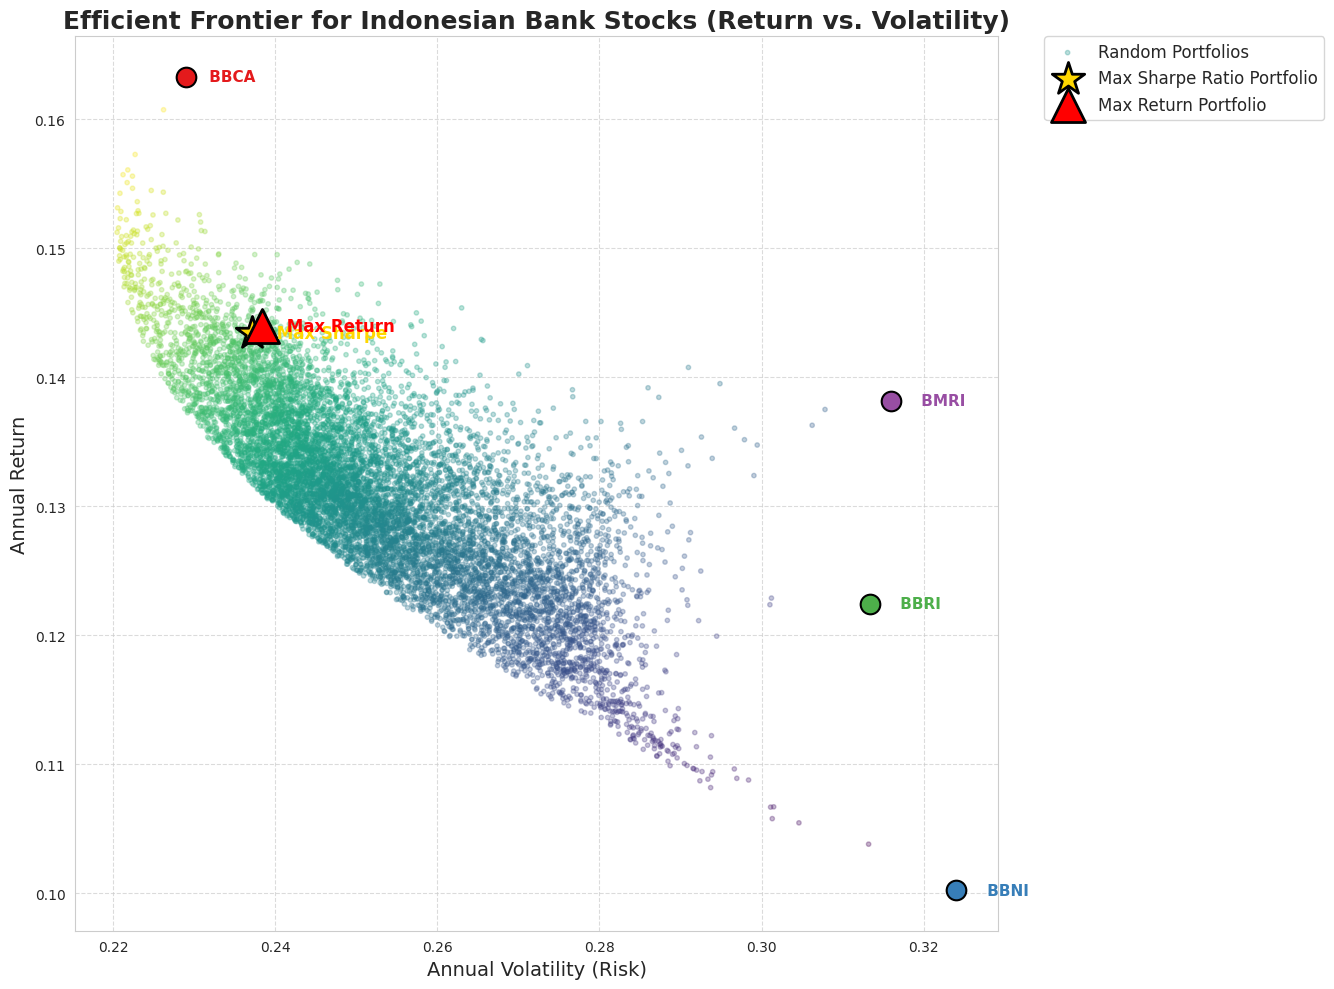

Visualisasi Batas Efisien (Efficient Frontier) yang cantik dan menarik telah berhasil dibuat.


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Re-using previously calculated variables:
# expected_returns, covariance_matrix, risk_free_rate, num_assets
# optimal_portfolio_return, optimal_portfolio_volatility (Max Sharpe)
# optimal_portfolio_return_max_return, optimal_portfolio_volatility_max_return (Max Return SLSQP)

# --- 1. Calculate individual stock returns and volatilities ---
stock_returns = expected_returns.values
stock_volatilities = np.array([portfolio_volatility(np.array([1 if i == j else 0 for j in range(num_assets)]), covariance_matrix) for i in range(num_assets)])

# --- 2. Generate Random Portfolios for Efficient Frontier ---
num_portfolios = 10000 # Number of random portfolios to generate
all_returns = []
all_volatilities = []
all_weights = []

for _ in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) # Ensure weights sum to 1
    all_weights.append(weights)

    p_return = portfolio_return(weights, expected_returns)
    p_volatility = portfolio_volatility(weights, covariance_matrix)

    all_returns.append(p_return)
    all_volatilities.append(p_volatility)

# --- 3. Create the Enhanced Efficient Frontier Visualization ---
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

# Plot all random portfolios
plt.scatter(all_volatilities, all_returns, c=np.array(all_returns)/np.array(all_volatilities), cmap='viridis',
            marker='o', s=10, alpha=0.3, label='Random Portfolios')

# Plot individual stocks
palette = sns.color_palette("Set1", n_colors=num_assets) # A different palette for distinction
for i, stock in enumerate(expected_returns.index):
    plt.scatter(stock_volatilities[i], stock_returns[i],
                marker='o', s=200, color=palette[i], edgecolor='black', linewidth=1.5, zorder=3)
    plt.text(stock_volatilities[i] * 1.01, stock_returns[i], f' {stock}',
             fontsize=11, ha='left', va='center', color=palette[i], fontweight='bold', zorder=4)

# Plot Optimal Sharpe Ratio Portfolio
plt.scatter(optimal_portfolio_volatility, optimal_portfolio_return,
            marker='*', s=600, color='gold', edgecolor='black', linewidth=2, zorder=5,
            label='Max Sharpe Ratio Portfolio')
plt.text(optimal_portfolio_volatility * 1.01, optimal_portfolio_return, ' Max Sharpe',
         fontsize=12, ha='left', va='center', color='gold', fontweight='bold', zorder=6)

# Plot Optimal Maximum Return Portfolio (using SLSQP results)
plt.scatter(optimal_portfolio_volatility_max_return, optimal_portfolio_return_max_return,
            marker='^', s=600, color='red', edgecolor='black', linewidth=2, zorder=5,
            label='Max Return Portfolio')
plt.text(optimal_portfolio_volatility_max_return * 1.01, optimal_portfolio_return_max_return, ' Max Return',
         fontsize=12, ha='left', va='center', color='red', fontweight='bold', zorder=6)

plt.title('Efficient Frontier for Indonesian Bank Stocks (Return vs. Volatility)', fontsize=18, fontweight='bold')
plt.xlabel('Annual Volatility (Risk)', fontsize=14)
plt.ylabel('Annual Return', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend
plt.show()

print("Visualisasi Batas Efisien (Efficient Frontier) yang cantik dan menarik telah berhasil dibuat.")

In [8]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Assuming df_selected_stocks is already loaded and preprocessed from previous cells.
# If not, please run cell 0CFoQoUFuM5X first.

# 1. Pivot the DataFrame to have 'Date' as index, 'Stock' as columns, and 'Close' prices as values
portfolio_prices = df_selected_stocks.pivot(columns='Stock', values='Close')

# 1.1 Calculate daily percentage returns for each stock
daily_returns = portfolio_prices.pct_change().dropna()

# Define the number of trading days in a year
TRADING_DAYS_PER_YEAR = 252

# 1.2 Calculate expected annual returns for each stock
expected_returns = daily_returns.mean() * TRADING_DAYS_PER_YEAR

# 1.3 Calculate the annual covariance matrix of the daily returns
covariance_matrix = daily_returns.cov() * TRADING_DAYS_PER_YEAR

# 2. Define portfolio return function
def portfolio_return(weights, expected_returns):
    return np.sum(expected_returns * weights)

# 3. Define portfolio volatility function
def portfolio_volatility(weights, covariance_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

# 4. Define Sharpe Ratio function (to be minimized as negative Sharpe Ratio)
def sharpe_ratio(weights, expected_returns, covariance_matrix, risk_free_rate):
    p_return = portfolio_return(weights, expected_returns)
    p_volatility = portfolio_volatility(weights, covariance_matrix)
    if p_volatility == 0:
        return -np.inf
    return -(p_return - risk_free_rate) / p_volatility

# 5. Set a risk-free rate
risk_free_rate = 0.02  # Example: 2% annual risk-free rate

# 6. Define constraints
num_assets = len(expected_returns)

# Constraint 1: Sum of weights must be 1 (full investment)
constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

# Constraint 2, 3, 4: Bounds for each weight (no short selling, min 5%, max 40%)
bounds = tuple([(0.05, 0.40) for _ in range(num_assets)]) # (min_weight, max_weight) for each asset

# Define negative portfolio return function to maximize return (by minimizing negative return)
def negative_portfolio_return(weights, expected_returns):
    return -portfolio_return(weights, expected_returns)

# --- OPTIMIZATION FOR MAXIMUM SHARPE RATIO (SLSQP) ---
initial_weights = np.array([1/num_assets] * num_assets)
optimal_results = minimize(
    sharpe_ratio,
    initial_weights,
    args=(expected_returns, covariance_matrix, risk_free_rate),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)
optimal_weights = optimal_results.x
optimal_portfolio_return = portfolio_return(optimal_weights, expected_returns)
optimal_portfolio_volatility = portfolio_volatility(optimal_weights, covariance_matrix)
optimal_sharpe_ratio = (optimal_portfolio_return - risk_free_rate) / optimal_portfolio_volatility


# --- OPTIMIZATION FOR MAXIMUM RETURN (SLSQP) ---
initial_weights_max_return = np.array([1/num_assets] * num_assets)
optimal_results_max_return = minimize(
    negative_portfolio_return,
    initial_weights_max_return,
    args=(expected_returns,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)
optimal_weights_max_return = optimal_results_max_return.x
optimal_portfolio_return_max_return = portfolio_return(optimal_weights_max_return, expected_returns)
optimal_portfolio_volatility_max_return = portfolio_volatility(optimal_weights_max_return, covariance_matrix)
if optimal_portfolio_volatility_max_return == 0:
    optimal_sharpe_ratio_max_return = -np.inf
else:
    optimal_sharpe_ratio_max_return = (optimal_portfolio_return_max_return - risk_free_rate) / optimal_portfolio_volatility_max_return


# --- OPTIMIZATION FOR MAXIMUM RETURN (TNC) ---
optimal_results_max_return_tnc = minimize(
    negative_portfolio_return,
    initial_weights_max_return,
    args=(expected_returns,),
    method='TNC',
    bounds=bounds
)
optimal_weights_max_return_tnc = optimal_results_max_return_tnc.x
if np.sum(optimal_weights_max_return_tnc) != 0:
    optimal_weights_max_return_tnc = optimal_weights_max_return_tnc / np.sum(optimal_weights_max_return_tnc)
optimal_portfolio_return_max_return_tnc = portfolio_return(optimal_weights_max_return_tnc, expected_returns)
optimal_portfolio_volatility_max_return_tnc = portfolio_volatility(optimal_weights_max_return_tnc, covariance_matrix)
if optimal_portfolio_volatility_max_return_tnc == 0:
    optimal_sharpe_ratio_max_return_tnc = -np.inf
else:
    optimal_sharpe_ratio_max_return_tnc = (optimal_portfolio_return_max_return_tnc - risk_free_rate) / optimal_portfolio_volatility_max_return_tnc


# --- OPTIMIZATION FOR MAXIMUM RETURN (L-BFGS-B) ---
optimal_results_max_return_lbfgsb = minimize(
    negative_portfolio_return,
    initial_weights_max_return,
    args=(expected_returns,),
    method='L-BFGS-B',
    bounds=bounds
)
optimal_weights_max_return_lbfgsb = optimal_results_max_return_lbfgsb.x
if np.sum(optimal_weights_max_return_lbfgsb) != 0:
    optimal_weights_max_return_lbfgsb = optimal_weights_max_return_lbfgsb / np.sum(optimal_weights_max_return_lbfgsb)
optimal_portfolio_return_max_return_lbfgsb = portfolio_return(optimal_weights_max_return_lbfgsb, expected_returns)
optimal_portfolio_volatility_max_return_lbfgsb = portfolio_volatility(optimal_weights_max_return_lbfgsb, covariance_matrix)
if optimal_portfolio_volatility_max_return_lbfgsb == 0:
    optimal_sharpe_ratio_max_return_lbfgsb = -np.inf
else:
    optimal_sharpe_ratio_max_return_lbfgsb = (optimal_portfolio_return_max_return_lbfgsb - risk_free_rate) / optimal_portfolio_volatility_max_return_lbfgsb


# --- OPTIMIZATION FOR MAXIMUM RETURN (TRUST-CONSTR) ---
optimal_results_max_return_trust_constr = minimize(
    negative_portfolio_return,
    initial_weights_max_return,
    args=(expected_returns,),
    method='trust-constr',
    bounds=bounds,
    constraints=constraints
)
optimal_weights_max_return_trust_constr = optimal_results_max_return_trust_constr.x
optimal_portfolio_return_max_return_trust_constr = portfolio_return(optimal_weights_max_return_trust_constr, expected_returns)
optimal_portfolio_volatility_max_return_trust_constr = portfolio_volatility(optimal_weights_max_return_trust_constr, covariance_matrix)
if optimal_portfolio_volatility_max_return_trust_constr == 0:
    optimal_sharpe_ratio_max_return_trust_constr = -np.inf
else:
    optimal_sharpe_ratio_max_return_trust_constr = (optimal_portfolio_return_max_return_trust_constr - risk_free_rate) / optimal_portfolio_volatility_max_return_trust_constr

print("All optimization results have been successfully calculated and stored.")

/usr/local/lib/python3.12/dist-packages/scipy/optimize/_differentiable_functions.py:728: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
/usr/local/lib/python3.12/dist-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


All optimization results have been successfully calculated and stored.


lustrasi untuk portofolio maximize return yang dihasilkan menggunakan metode SLSQP sudah tersedia dalam visualisasi Batas Efisien (Efficient Frontier) yang baru saja saya tampilkan.

Portofolio Maximize Return (hasil dari metode SLSQP) direpresentasikan sebagai Panah Merah (segitiga ke atas) pada grafik tersebut.

Grafik tersebut menunjukkan posisi portofolio ini dalam kaitannya dengan return dan volatilitas, serta membandingkannya dengan saham-saham individual dan portofolio Sharpe Ratio maksimum. Ini adalah ilustrasi yang paling sesuai untuk menunjukkan hasil optimasi maximize return Anda.

### Ringkasan Statistik untuk Metode SLSQP

In [ ]:
# Filter the summary_df for the SLSQP method
slsqp_summary = summary_df[summary_df['Method'] == 'SLSQP']

print("Optimal Weights and Performance Metrics for SLSQP Method:")
print(slsqp_summary.round(4).to_markdown(index=False))
